In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Set plotting style
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Load the data
file_path = 'Pro_Act_clean_final.csv'
df = pd.read_csv(file_path)
print("Shape of the dataset:", df.shape)
print("Features of the dataset:", df.columns.tolist())
print("Number of unique patients:", df['subject_id'].nunique())

Shape of the dataset: (69166, 61)
Features of the dataset: ['subject_id', 'Age', 'Sex', 'Race', 'Onset_site', 'Onset_Delta', 'Subject_used_Riluzole', 'Riluzole_use_Delta', 'Study_Arm', 'Treatment_Group_Delta', 'Subj_condition', 'Time_Event', 'DELTA', 'Q1_Speech', 'Q2_Salivation', 'Q3_Swallowing', 'Q4_Handwriting', 'Q5_Cutting', 'Q6_Dressing_and_Hygiene', 'Q7_Turning_in_Bed', 'Q8_Walking', 'Q9_Climbing_Stairs', 'Q10_Respiratory', 'ALSFRS_Total', 'Movement', 'Swallowing', 'Communicating', 'Breathing', 'Fvc_Liters_Trial_1', 'Absolute Eosinophil Count__10E9/L', 'Albumin__g/L', 'Alkaline Phosphatase__U/L', 'ALT(SGPT)__U/L', 'AST(SGOT)__U/L', 'Bicarbonate__mmol/L', 'Bilirubin (Total)__umol/L', 'Blood Urea Nitrogen (BUN)__mmol/L', 'Calcium__mmol/L', 'Chloride__mmol/L', 'CK__U/L', 'Creatinine__umol/L', 'Glucose__mmol/L', 'Hematocrit__%', 'Hemoglobin__g/L', 'Platelets__10E9/L', 'Potassium__mmol/L', 'Protein__g/L', 'Red Blood Cells (RBC)__10E9/L', 'Sodium__mmol/L', 'White Blood Cell (WBC)__10E9/

In [4]:
df.head()

,subject_id,Age,Sex,Race,Onset_site,Onset_Delta,Subject_used_Riluzole,Riluzole_use_Delta,Study_Arm,Treatment_Group_Delta,Subj_condition,Time_Event,DELTA,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Total,Movement,Swallowing,Communicating,Breathing,Fvc_Liters_Trial_1,Absolute Eosinophil Count__10E9/L,Albumin__g/L,Alkaline Phosphatase__U/L,ALT(SGPT)__U/L,AST(SGOT)__U/L,Bicarbonate__mmol/L,Bilirubin (Total)__umol/L,Blood Urea Nitrogen (BUN)__mmol/L,Calcium__mmol/L,Chloride__mmol/L,CK__U/L,Creatinine__umol/L,Glucose__mmol/L,Hematocrit__%,Hemoglobin__g/L,Platelets__10E9/L,Potassium__mmol/L,Protein__g/L,Red Blood Cells (RBC)__10E9/L,Sodium__mmol/L,White Blood Cell (WBC)__10E9/L,Absolute Basophil Count__10E9/L,Absolute Lymphocyte Count__10E9/L,Absolute Monocyte Count__10E9/L,Absolute Neutrophil Count__10E9/L,Gamma-glutamyltransferase__U/L,Blood_Pressure_Diastolic__mmHg,Blood_Pressure_Systolic__mmHg,Height__cm,Pulse__Beats_per_minute,Respiratory_Rate__Breaths_per_minute,Weight__kg
0,329,38.0,Female,Black_African_American,Limb,-1706.0,NaN,NaN,Active,0.0,Censored,274,0,4.0,3.0,4.0,3.0,2.0,3.0,2.0,2.0,1.0,3.0,27.0,0.0,0.0,0.0,0.0,2.49,7.0,40.0,66.0,18.0,20.0,21.0,0.000,2.9208,2.2455,105.0,350.0,88.4,4.9395,41.0,130.0,273.0,4.0,70.0,4000.0,138.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.5,NaN,32.0,52.2
1,329,38.0,Female,Black_African_American,Limb,-1706.0,NaN,NaN,Active,0.0,Censored,274,8,4.0,3.0,4.0,3.0,1.5,3.0,2.0,2.0,1.0,3.0,26.5,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.5,NaN,29.0,52.1
2,329,38.0,Female,Black_African_American,Limb,-1706.0,NaN,NaN,Active,0.0,Censored,274,16,4.0,3.0,4.0,3.0,1.0,3.0,2.0,2.0,1.0,3.0,26.0,0.0,0.0,0.0,0.0,2.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.5,NaN,26.0,52.0
3,329,38.0,Female,Black_African_American,Limb,-1706.0,NaN,NaN,Active,0.0,Censored,274,42,4.0,3.0,4.0,3.0,1.0,3.0,2.0,2.0,1.0,3.0,26.0,0.0,0.0,0.0,0.0,2.75,1.0,45.0,75.0,49.0,30.0,21.0,0.000,2.1906,2.2455,104.0,108.0,88.4,5.9385,38.0,120.0,239.0,4.0,70.0,5000.0,137.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.5,NaN,26.0,49.8
4,329,38.0,Female,Black_African_American,Limb,-1706.0,NaN,NaN,Active,0.0,Censored,274,72,4.0,3.0,4.0,3.0,1.0,3.0,2.0,2.0,1.0,3.0,26.0,0.0,0.0,0.0,0.0,2.79,5.0,40.0,77.0,29.0,21.0,25.0,17.104,1.8255,2.2455,98.0,78.0,0.0,5.5500,38.0,120.0,161.0,3.0,70.0,5000.0,141.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.5,NaN,22.0,45.8


We are checking how many missing values there are for each column in the dataset.

In [5]:
df.isnull().sum()

,0
subject_id,0
Age,12417
Sex,0
Race,633
Onset_site,13
Onset_Delta,512
Subject_used_Riluzole,15482
Riluzole_use_Delta,15482
Study_Arm,2953
Treatment_Group_Delta,3547


In [6]:
# Basic statistics
df.describe(include='all')

,subject_id,Age,Sex,Race,Onset_site,Onset_Delta,Subject_used_Riluzole,Riluzole_use_Delta,Study_Arm,Treatment_Group_Delta,Subj_condition,Time_Event,DELTA,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Total,Movement,Swallowing,Communicating,Breathing,Fvc_Liters_Trial_1,Absolute Eosinophil Count__10E9/L,Albumin__g/L,Alkaline Phosphatase__U/L,ALT(SGPT)__U/L,AST(SGOT)__U/L,Bicarbonate__mmol/L,Bilirubin (Total)__umol/L,Blood Urea Nitrogen (BUN)__mmol/L,Calcium__mmol/L,Chloride__mmol/L,CK__U/L,Creatinine__umol/L,Glucose__mmol/L,Hematocrit__%,Hemoglobin__g/L,Platelets__10E9/L,Potassium__mmol/L,Protein__g/L,Red Blood Cells (RBC)__10E9/L,Sodium__mmol/L,White Blood Cell (WBC)__10E9/L,Absolute Basophil Count__10E9/L,Absolute Lymphocyte Count__10E9/L,Absolute Monocyte Count__10E9/L,Absolute Neutrophil Count__10E9/L,Gamma-glutamyltransferase__U/L,Blood_Pressure_Diastolic__mmHg,Blood_Pressure_Systolic__mmHg,Height__cm,Pulse__Beats_per_minute,Respiratory_Rate__Breaths_per_minute,Weight__kg
count,69166.000000,56749.000000,69166,68533,69153,68654.000000,53684,53684.000000,66213,65619.000000,69166,69166.000000,69166.000000,55718.000000,55716.000000,55715.000000,55714.000000,48370.000000,55713.000000,55710.000000,55712.000000,55714.000000,55709.000000,50424.000000,55718.000000,55715.000000,55719.000000,55709.000000,39544.000000,41345.000000,45771.000000,38401.00000,50565.000000,50417.000000,45171.000000,49238.000000,50789.000000,45768.000000,49030.000000,36677.000000,50825.000000,48387.000000,47861.000000,48078.000000,39383.000000,50453.000000,38363.000000,44401.000000,50578.000000,44448.000000,39377.000000,35771.000000,35769.000000,35770.000000,31490.000000,42270.000000,42286.000000,49498.000000,42345.000000,47195.00000,43933.000000
unique,NaN,NaN,2,17,5,NaN,2,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Male,Caucasian,Limb,NaN,Yes,NaN,Active,NaN,Censored,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,43389,65147,47150,NaN,40441,NaN,38808,NaN,52286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,505094.536188,55.157818,NaN,NaN,NaN,-644.976258,NaN,0.224853,NaN,21.765007,NaN,482.898187,197.383931,2.839531,3.073462,3.150749,2.423912,2.184489,1.963997,2.495016,2.295807,1.434433,3.280215,25.682631,0.377562,0.086153,0.057880,0.068140,3.061426,0.510252,43.219434,78.16909,34.290337,29.769160,25.999966,9.965563,5.607308,2.366591,102.567285,288.939587,66.072660,5.631085,40.080039,144.278875,241.844714,4.191537,71.874706,4611.732852,140.230952,6.982606,435.003065,1.728471,0.434766,4.575753,36.393689,80.326260,128.660833,170.729489,77.903176,18.00374,74.193500
std,290772.049896,11.723876,NaN,NaN,NaN,407.219899,NaN,6.825782,NaN,75.289562,NaN,246.315501,193.506554,1.274640,1.167693,1.083936,1.349130,1.366199,1.248526,1.256492,1.100802,1.397523,0.962451,7.842088,0.484782,0.280592,0.233518,0.251988,1.221785,1.242214,3.548341,29.46028,23.711937,15.122616,3.399654,6.068386,1.675628,0.122987,3.434246,303.476730,35.619807,1.606325,11.941743,12.976215,75.909236,0.477204,4.711876,1089.353604,2.736678,1.930625,1372.818568,0.580839,0.176495,1.610904,42.923100,10.443409,16.338302,9.801765,12.474452,3.73962,15.928941
min,329.000000,18.000000,NaN,NaN,NaN,-8741.000000,NaN,-28.000000,NaN,0.000000,NaN,145.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Checking the values and their count for Riluzole_use_Delta and Treatment_Group_Delta features. Most of them are equal to 0 or positive and negative values close to 0. This means that most of the patients started using (being treated) with Riluzole as soon as they were diagnosed with ALS.

In [7]:
print("Riluzole_use_Delta counts:")
print(df['Riluzole_use_Delta'].value_counts())

print("\nTreatment_Group_Delta counts:")
print(df['Treatment_Group_Delta'].value_counts())

Riluzole_use_Delta counts:
Riluzole_use_Delta
 0.0      52983
 1.0        164
 4.0         94
 2.0         74
 3.0         72
 6.0         35
 5.0         28
 7.0         21
 123.0       14
-12.0        14
 13.0        14
 56.0        14
 154.0       14
 32.0        14
 8.0         14
 365.0       14
 27.0        14
 9.0         13
-5.0         13
 11.0        12
-2.0          7
-23.0         7
-1.0          7
-28.0         7
-9.0          7
 14.0         7
 15.0         7
Name: count, dtype: int64

Treatment_Group_Delta counts:
Treatment_Group_Delta
0.0      56775
119.0      927
126.0      727
133.0      377
7.0        258
140.0      256
14.0       255
127.0      233
118.0      227
124.0      221
147.0      216
120.0      216
125.0      194
112.0      184
123.0      181
128.0      150
132.0      138
131.0      135
490.0      126
134.0      114
129.0      107
136.0      105
497.0      104
117.0      103
111.0      102
8.0         98
138.0       96
13.0        95
135.0       94
122.0   

In [8]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


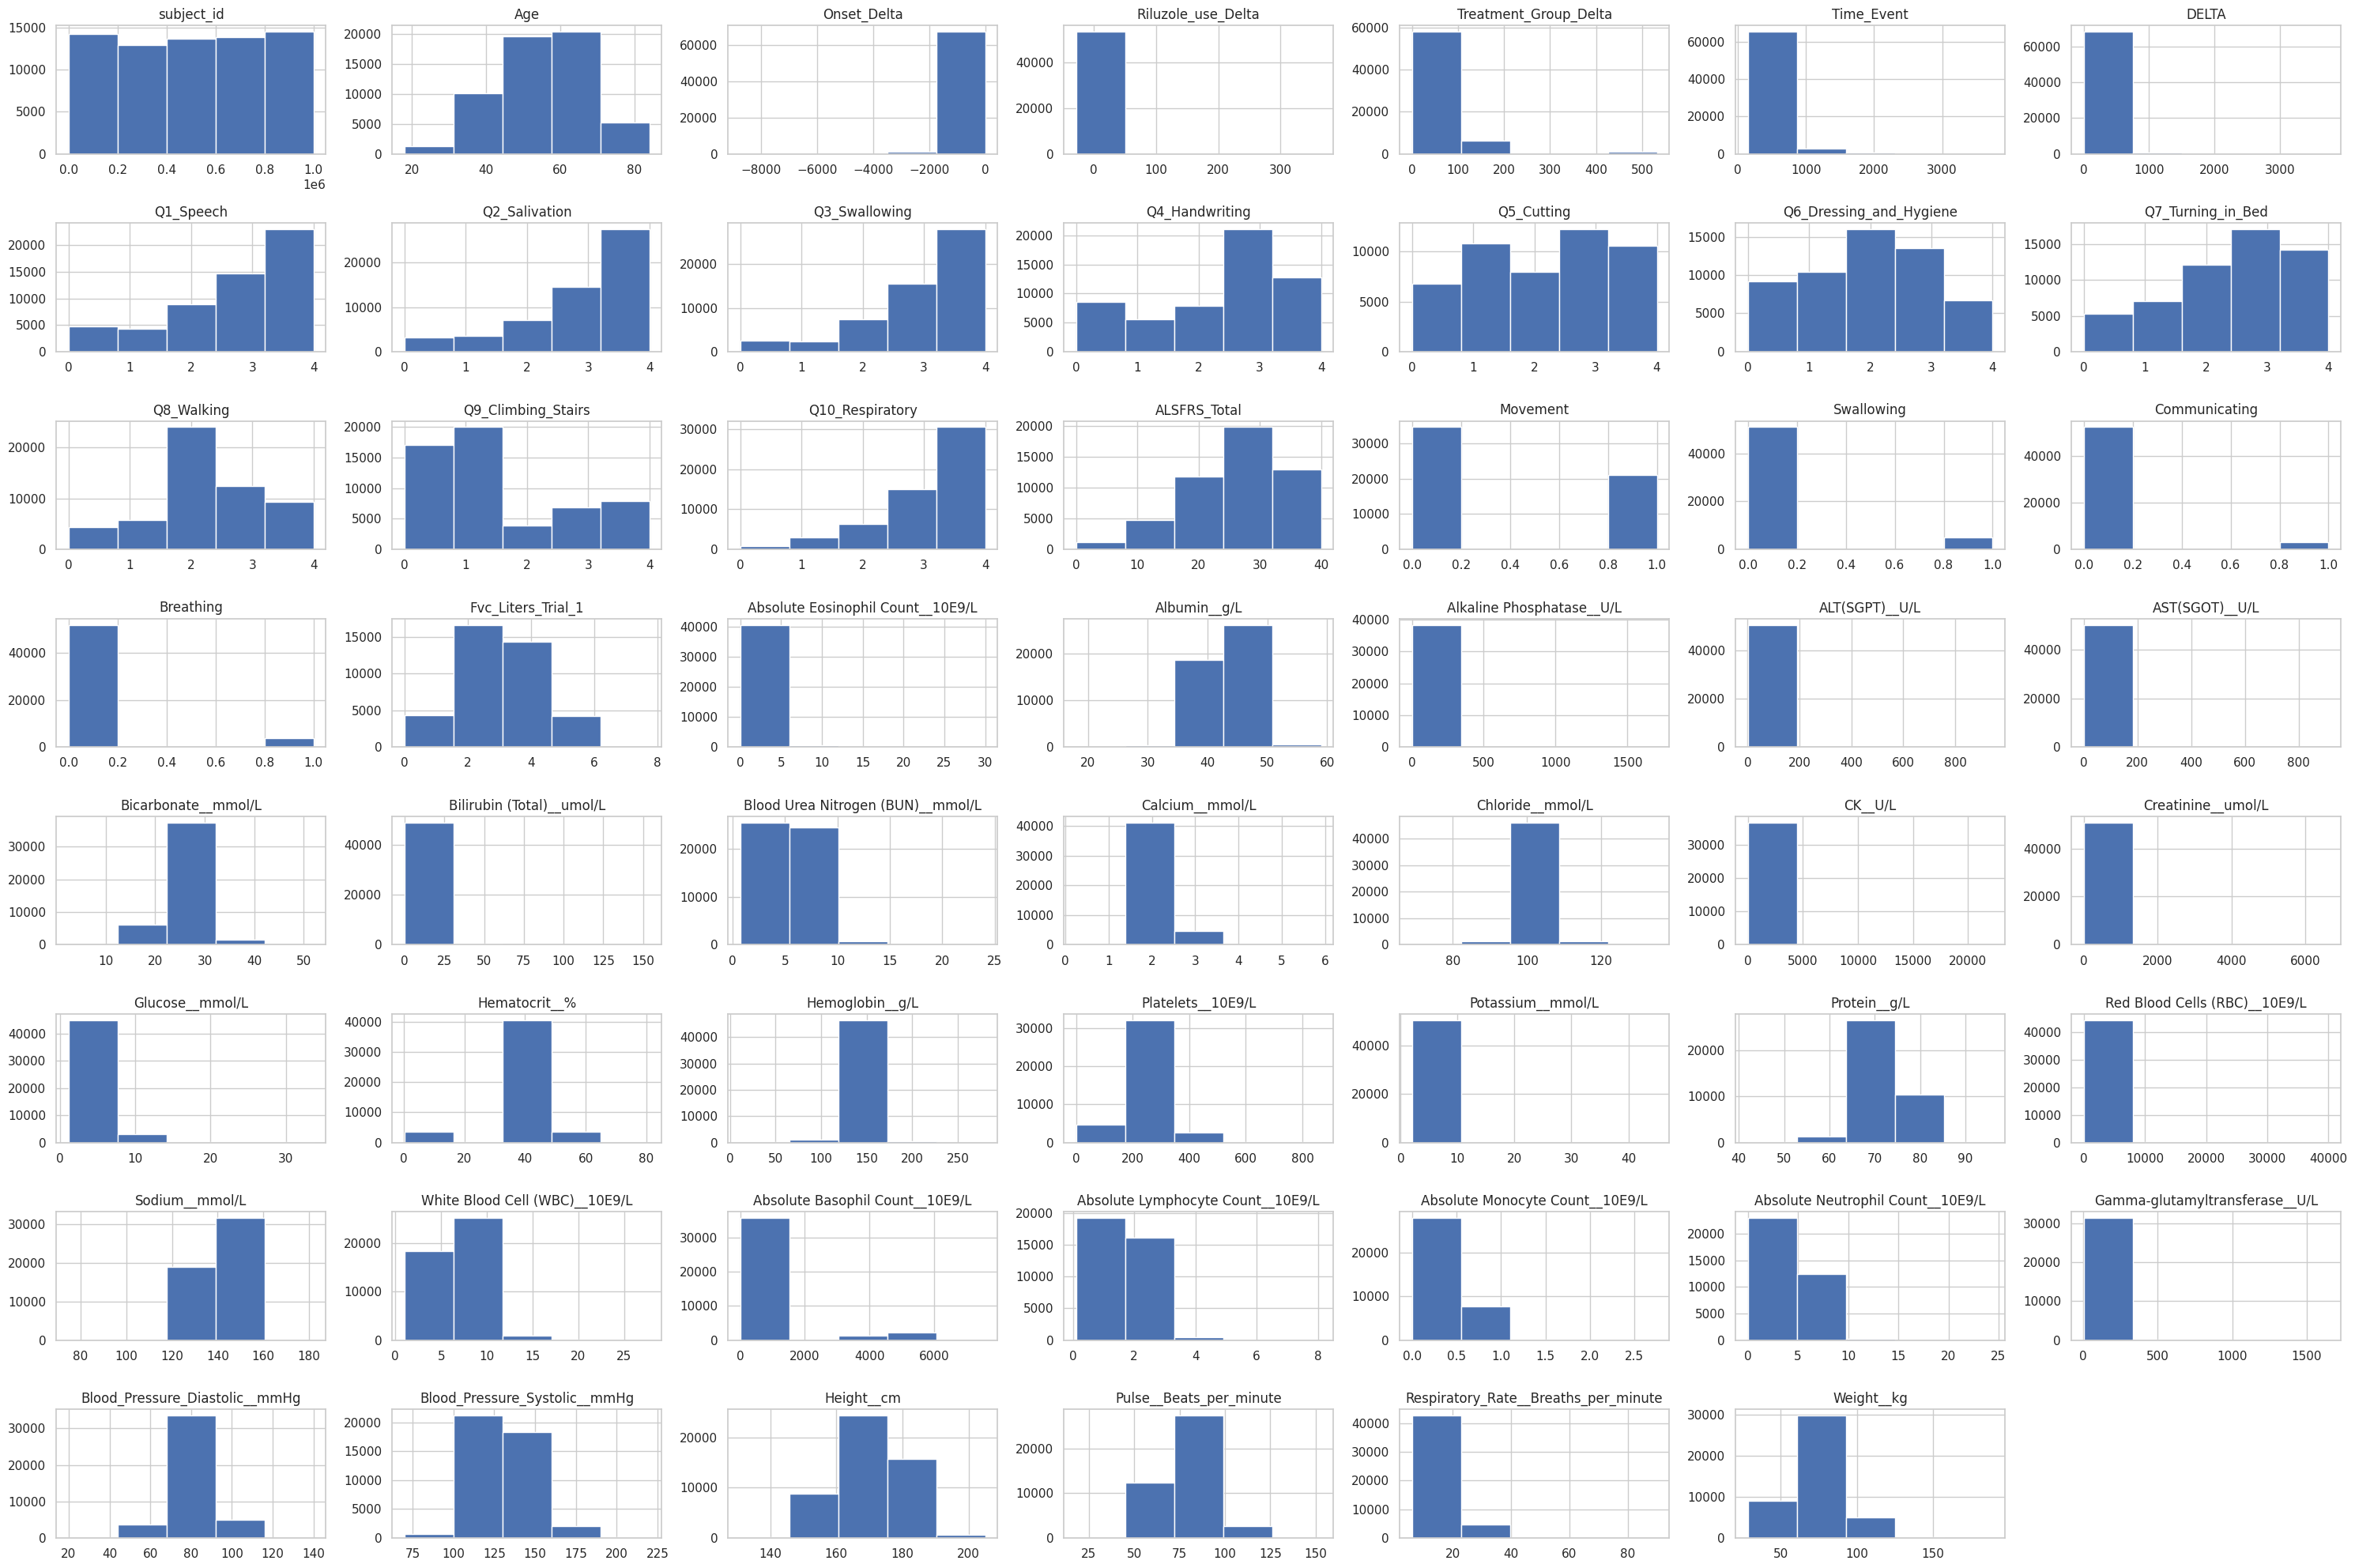

In [9]:
# Distribution of numerical features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].hist(bins=5, figsize=(30, 20))
plt.tight_layout()
plt.show()

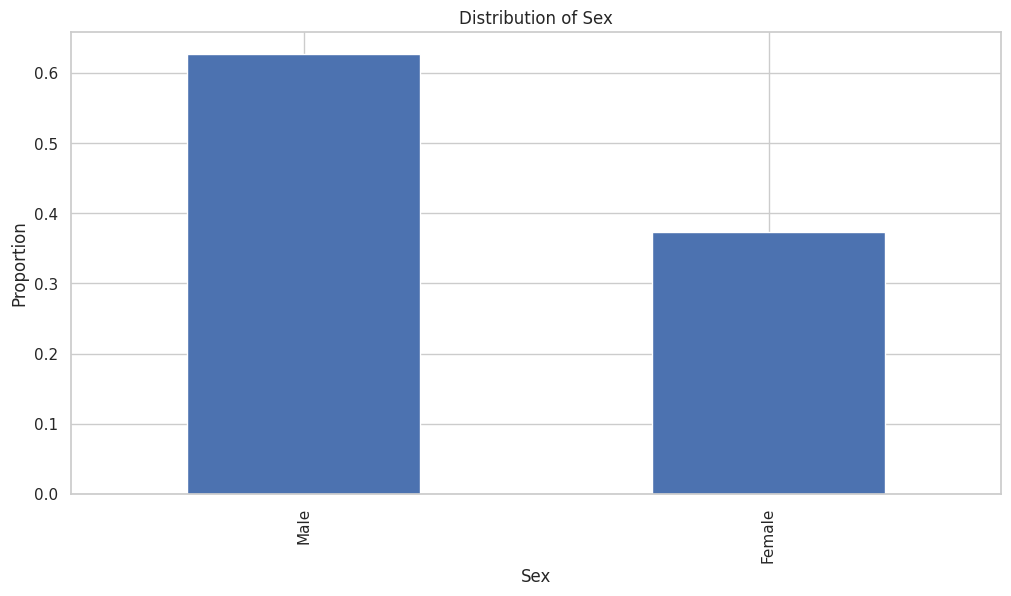

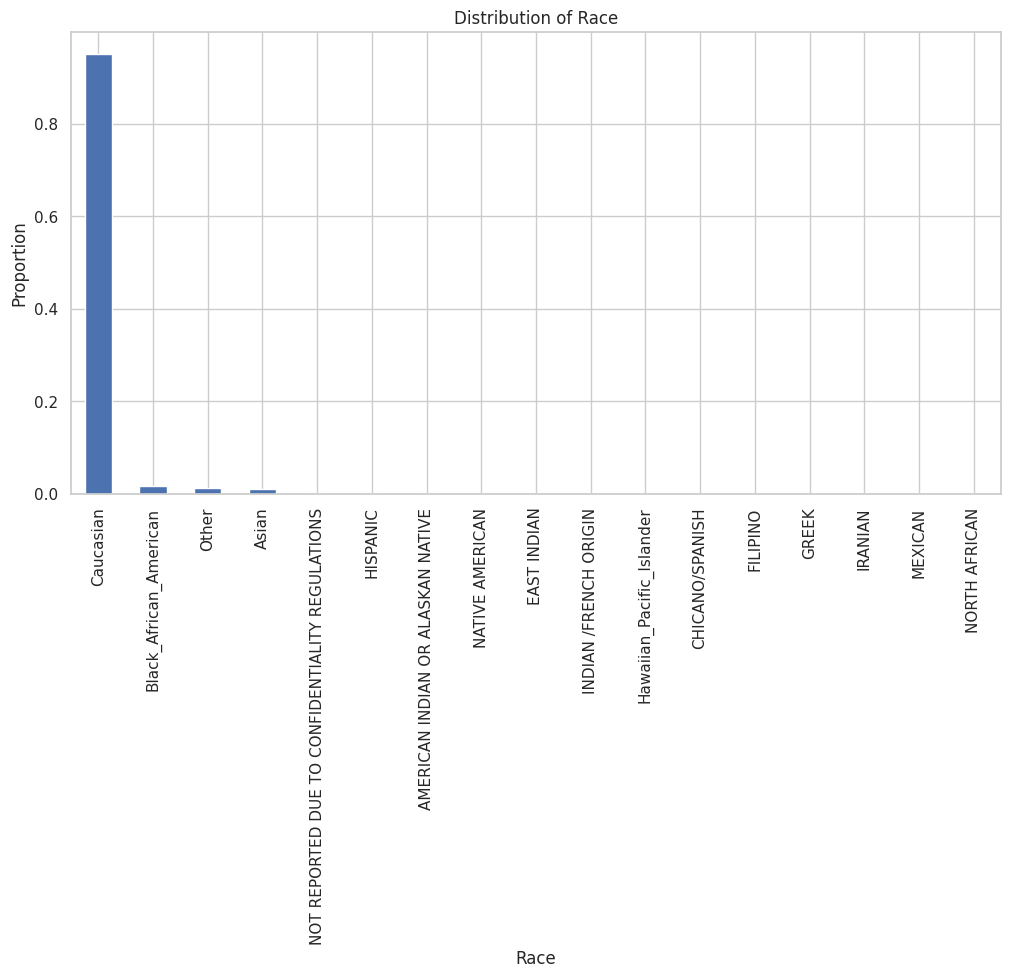

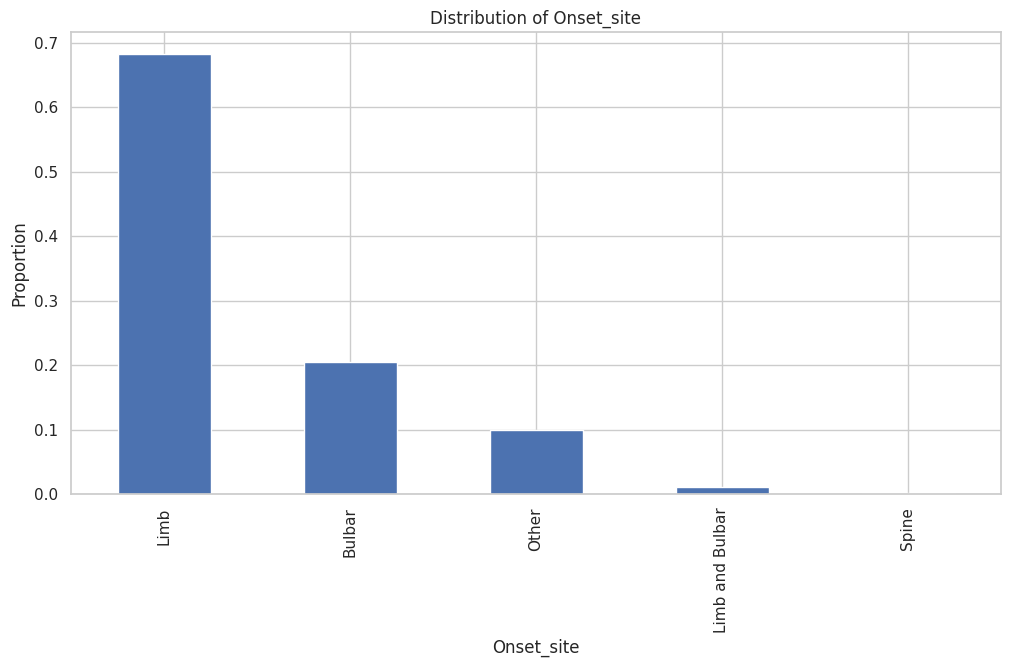

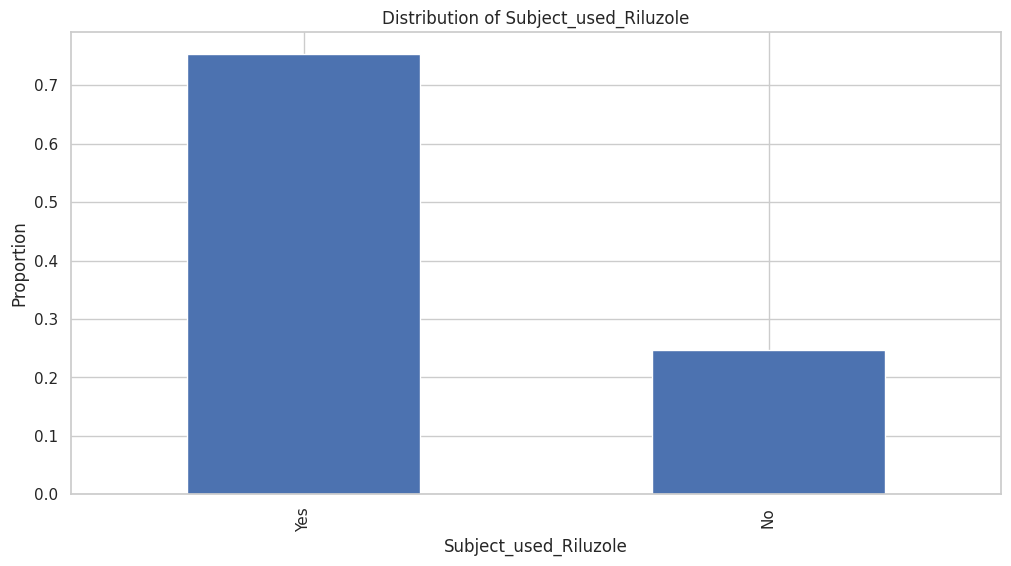

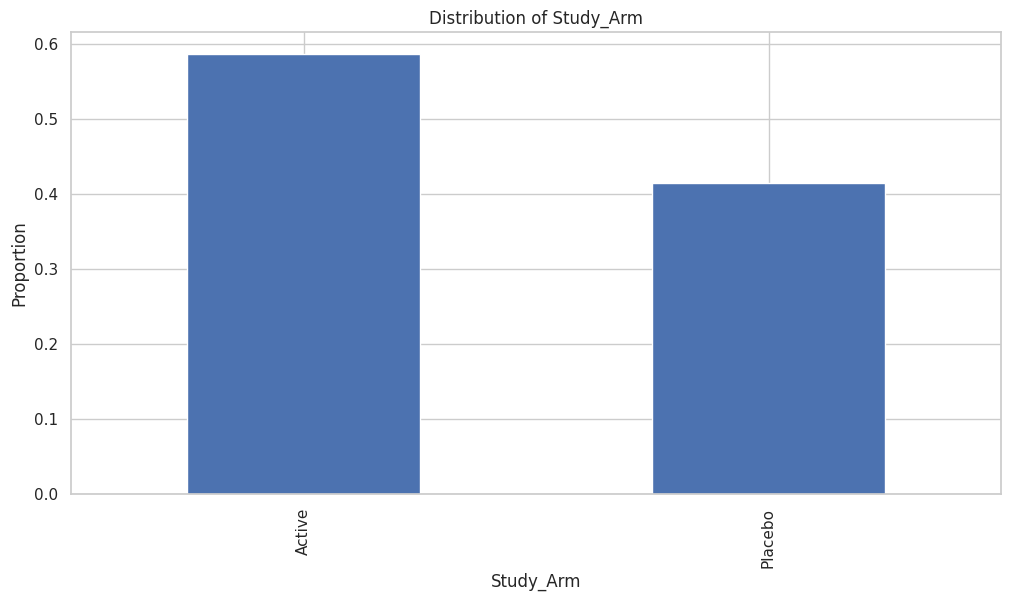

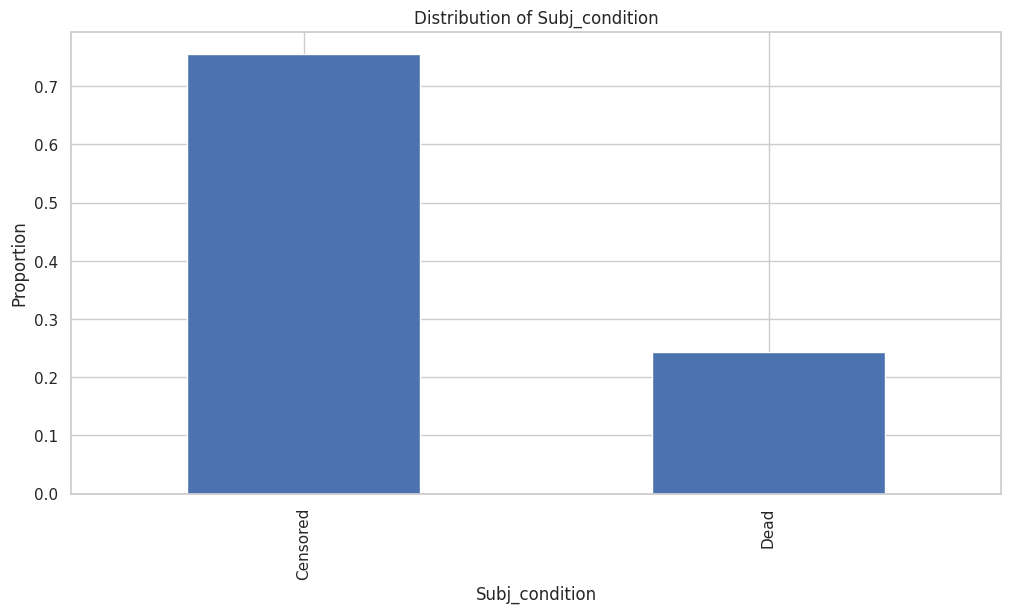

In [10]:
# Distribution of categorical features
# Get categorical columns
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
for col in cat_cols:
    plt.figure()
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Proportion')
    plt.show()

In [11]:
# Join Limb and Spine Onset_site as they have the same meaning
df['Onset_site'] = df['Onset_site'].replace('Spine', 'Limb')

We discard the Race feature as almost all of the patients are Caucasian. We also discard the Treatment_Group_Delta and Riluzole_use_Delta as in most cases they are equal to 0 or to a really small value (in absolute terms close to 0). Movement, Swallowing, Communicating, and Breathing are dropped as we decided to focus on the 10 ALSFRS items. Additionally, the Subj_condition and Time_Event are removed as they are relevant only when predicting the death of a patient.

In [12]:
# List of columns to discard
cols_to_discard = ['Race', 'Treatment_Group_Delta', 'Riluzole_use_Delta', 'Subj_condition', 'Time_Event', 'Movement', 'Swallowing', 'Communicating', 'Breathing']
df = df.drop(columns=cols_to_discard)

Here we try to deterministically impute the missing ALSFRS items based on all the other ALSFRS items and the Total ALSFRS score. This can be achieved if only one value of them is missing. In all the other cases, it is not possible to determine the true value.

In [13]:
# Define ALSFRS variables
items = [
        'Q1_Speech', 'Q2_Salivation', 'Q3_Swallowing', 'Q4_Handwriting',
        'Q5_Cutting', 'Q6_Dressing_and_Hygiene', 'Q7_Turning_in_Bed',
        'Q8_Walking', 'Q9_Climbing_Stairs', 'Q10_Respiratory'
        ]
total_score = 'ALSFRS_Total'

# Deterministic imputation of ALSFRS items
def infer_alsfrs_items(df):
    df = df.copy()
    recovered_total, recovered_item = 0, 0

    for idx, row in df.iterrows():
        sub_values = row[items]
        total_val = row[total_score]

        # 1. Recover ALSFRS_Total
        if pd.isna(total_val) and sub_values.notna().sum() == 10:
            df.at[idx, total_score] = sub_values.sum()
            recovered_total += 1

        # 2. Recover a single item
        elif pd.notna(total_val) and sub_values.isna().sum() == 1:
            missing_sub = sub_values[sub_values.isna()].index[0]
            inferred_value = total_val - sub_values.dropna().sum()

            # Only assign if value is in valid range
            if 0 <= inferred_value <= 4:
                df.at[idx, missing_sub] = inferred_value
                recovered_item += 1
            else:
                print(f"Inferred value for {missing_sub} is not in valid range: {inferred_value}!")

    print(f"Recovered {recovered_total} ALSFRS_Total scores")
    print(f"Recovered {recovered_item} individual items")

    return df

There were 254 missing values for the ALSFRS items that could be inferred but didn't fall in the valid range from 0 to 4, so they were left out.

In [14]:
# Before inferring missing values
print(df[["ALSFRS_Total"] + items].isna().sum())

# Apply inference
df = infer_alsfrs_items(df)

# After inferring missing values
print(df[["ALSFRS_Total"] + items].isna().sum())

ALSFRS_Total               18742
Q1_Speech                  13448
Q2_Salivation              13450
Q3_Swallowing              13451
Q4_Handwriting             13452
Q5_Cutting                 20796
Q6_Dressing_and_Hygiene    13453
Q7_Turning_in_Bed          13456
Q8_Walking                 13454
Q9_Climbing_Stairs         13452
Q10_Respiratory            13457
dtype: int64
Inferred value for Q5_Cutting is not in valid range: 6.0!
Inferred value for Q5_Cutting is not in valid range: 8.0!
Inferred value for Q5_Cutting is not in valid range: 6.0!
Inferred value for Q5_Cutting is not in valid range: 5.0!
Inferred value for Q5_Cutting is not in valid range: 5.0!
Inferred value for Q5_Cutting is not in valid range: 6.0!
Inferred value for Q5_Cutting is not in valid range: 6.0!
Inferred value for Q5_Cutting is not in valid range: 5.0!
Inferred value for Q5_Cutting is not in valid range: 5.0!
Inferred value for Q5_Cutting is not in valid range: 5.0!
Inferred value for Q5_Cutting is not in vali

We decided to exclude all patients with fewer than 5 visits, since in the simulated data patients will always have at least 5 visits.

In [15]:
# Calculate number of visits and total follow-up time per patient
patient_summary = df.groupby('subject_id').agg(
    number_of_visits = ('DELTA', 'count'),
).reset_index()
print(patient_summary.head())
# Summary statistics for number_of_visits
print(patient_summary[['number_of_visits']].describe())
# Count how many patients have less than 5 visits
patients_less_than_5_visits = patient_summary[patient_summary['number_of_visits'] < 5].shape[0]

print(f"Number of patients with fewer than 5 visits: {patients_less_than_5_visits}")
# Filter out patients with fewer than 5 visits
valid_patients = patient_summary[patient_summary['number_of_visits'] >= 5]['subject_id']
filtered_df = df[df['subject_id'].isin(valid_patients)].copy()

print(f"Original number of patients: {patient_summary.shape[0]}")
print(f"Number of patients after filtering: {valid_patients.nunique()}")
print(f"Remaining data shape: {filtered_df.shape}")

# Recompute patient summary after filtering
filtered_patient_summary = filtered_df.groupby('subject_id').agg(
    number_of_visits=('DELTA', 'count'),
).reset_index()

print("Filtered patient summary:\n", filtered_patient_summary[['number_of_visits']].describe())

   subject_id  number_of_visits
0         329                12
1         348                21
2         533                 9
3         649                12
4         708                11
       number_of_visits
count       5441.000000
mean          12.712001
std            6.231645
min            3.000000
25%            9.000000
50%           12.000000
75%           13.000000
max          100.000000
Number of patients with fewer than 5 visits: 28
Original number of patients: 5441
Number of patients after filtering: 5413
Remaining data shape: (69061, 52)
Filtered patient summary:
        number_of_visits
count        5413.00000
mean           12.75836
std             6.21415
min             5.00000
25%             9.00000
50%            12.00000
75%            13.00000
max           100.00000


In [16]:
# Drop rows where any of the 10 ALSFRS items are still missing
df = df.dropna(subset=items)
print(f"Remaining rows after dropping incomplete target labels (ALSFRS items): {df.shape[0]}")

Remaining rows after dropping incomplete target labels (ALSFRS items): 50160


The next step is to fill the missing values for the categorical variables with the desired (i.e., assumed) defaults. For Subject_used_Riluzole we assume the value No as we expect that it would probably be mentioned if the patient was treated with it. For Study_Arm and Sex we apply the majority rule and assume Active and Male, respectively. Here, we also believe that if the patient were in the Placebo group, it would be most likely mentioned. For the Onset_site, we don't want to assume anything and that's why we categorize the missing values as Other.

In [17]:
# Fill missing values with desired defaults
df['Subject_used_Riluzole'] = df['Subject_used_Riluzole'].fillna('No')
df['Study_Arm'] = df['Study_Arm'].fillna('Active')
df['Sex'] = df['Sex'].fillna('Male')
df['Onset_site'] = df['Onset_site'].fillna('Other')

Again, after the performed filtering, check the number of visits per patient and remove the patients with less than 5 visits. They are considered less relevant.

In [18]:
# Calculate number of visits per patient
patient_summary = df.groupby('subject_id').agg(
    number_of_visits = ('DELTA', 'count'),
).reset_index()
patient_summary.head()

,subject_id,number_of_visits
0,329,12
1,348,15
2,533,6
3,649,12
4,708,11


In [19]:
# Summary statistics for number_of_visits
patient_summary[['number_of_visits']].describe()

,number_of_visits
count,5145.000000
mean,9.749271
std,3.547790
min,1.000000
25%,7.000000
50%,10.000000
75%,12.000000
max,22.000000


In [20]:
# Count how many patients have less than 5 visits
patients_less_than_5_visits = patient_summary[patient_summary['number_of_visits'] < 5].shape[0]

print(f"Number of patients with fewer than 5 visits: {patients_less_than_5_visits}")

Number of patients with fewer than 5 visits: 326


In [21]:
# Filter out patients with fewer than 5 visits
valid_patients = patient_summary[patient_summary['number_of_visits'] >= 5]['subject_id']
filtered_df = df[df['subject_id'].isin(valid_patients)].copy()

print(f"Original number of patients: {patient_summary.shape[0]}")
print(f"Number of patients after filtering: {valid_patients.nunique()}")
print(f"Remaining data shape: {filtered_df.shape}")

# Recompute patient summary after filtering
filtered_patient_summary = filtered_df.groupby('subject_id').agg(
    number_of_visits=('DELTA', 'count'),
).reset_index()

print("Filtered patient summary:\n", filtered_patient_summary[['number_of_visits']].describe())

Original number of patients: 5145
Number of patients after filtering: 4819
Remaining data shape: (49143, 52)
Filtered patient summary:
        number_of_visits
count       4819.000000
mean          10.197759
std            3.192084
min            5.000000
25%            7.000000
50%           11.000000
75%           12.000000
max           22.000000


Calculate again for each feature the percentage of missing values across all rows. Then remove the features for which at least 50% values are missing. There is no point in imputing values that are missing in the majority of the cases.

In [22]:
missing_percentage = filtered_df.isnull().mean() * 100
missing_percentage = missing_percentage.round(2).sort_values(ascending=False)
missing_percentage

,0
Absolute Monocyte Count__10E9/L,51.78
Absolute Lymphocyte Count__10E9/L,51.77
Absolute Neutrophil Count__10E9/L,51.77
Gamma-glutamyltransferase__U/L,46.26
Absolute Basophil Count__10E9/L,46.07
Absolute Eosinophil Count__10E9/L,40.58
Blood_Pressure_Diastolic__mmHg,40.04
Blood_Pressure_Systolic__mmHg,40.03
Pulse__Beats_per_minute,39.83
CK__U/L,35.93


In [23]:
# List of columns to discard (more than 50% missing or obsolete)
cols_to_discard = ['Absolute Lymphocyte Count__10E9/L',
                   'Absolute Monocyte Count__10E9/L',
                   'Absolute Neutrophil Count__10E9/L',
                   'ALSFRS_Total']
filtered_df = filtered_df.drop(columns=cols_to_discard)

In [24]:
filtered_df.dtypes

,0
subject_id,int64
Age,float64
Sex,object
Onset_site,object
Onset_Delta,float64
Subject_used_Riluzole,object
Study_Arm,object
DELTA,int64
Q1_Speech,float64
Q2_Salivation,float64


In [25]:
# Define variables for imputation
excluded_cols = ["subject_id", "DELTA"]
excluded_all = set(excluded_cols + items)

imputation_cols = [
    'Age',
    'Sex',
    'Onset_site',
    'Onset_Delta',
    'Subject_used_Riluzole',
    'Study_Arm',
    'Fvc_Liters_Trial_1',
    'Absolute Eosinophil Count__10E9/L',
    'Albumin__g/L',
    'Alkaline Phosphatase__U/L',
    'ALT(SGPT)__U/L',
    'AST(SGOT)__U/L',
    'Bicarbonate__mmol/L',
    'Bilirubin (Total)__umol/L',
    'Blood Urea Nitrogen (BUN)__mmol/L',
    'Calcium__mmol/L',
    'Chloride__mmol/L',
    'CK__U/L',
    'Creatinine__umol/L',
    'Glucose__mmol/L',
    'Hematocrit__%',
    'Hemoglobin__g/L',
    'Platelets__10E9/L',
    'Potassium__mmol/L',
    'Protein__g/L',
    'Red Blood Cells (RBC)__10E9/L',
    'Sodium__mmol/L',
    'White Blood Cell (WBC)__10E9/L',
    'Absolute Basophil Count__10E9/L',
    'Gamma-glutamyltransferase__U/L',
    'Blood_Pressure_Diastolic__mmHg',
    'Blood_Pressure_Systolic__mmHg',
    'Height__cm',
    'Pulse__Beats_per_minute',
    'Respiratory_Rate__Breaths_per_minute',
    'Weight__kg',
]

In [26]:
# Categorical conversion - Encode caterogical variables with (ordered) numbers
categorical_cols = ["Sex", "Onset_site", "Subject_used_Riluzole", "Study_Arm"]
for col in categorical_cols:
    filtered_df[col] = filtered_df[col].astype("category")
    filtered_df[col] = filtered_df[col].cat.as_ordered()

# Encode categorical variables numerically
encoders = {}

def encode_categories(dataframe):
    df_copy = dataframe.copy()
    for col in imputation_cols:
        if df_copy[col].dtype.name == 'category':
            le = LabelEncoder()
            non_null = df_copy[col].dropna().astype(str)
            le.fit(non_null)

            # Store encoder
            encoders[col] = le

            # Map known values; leave NaNs untouched
            df_copy[col] = df_copy[col].map(lambda x: le.transform([str(x)])[0] if pd.notna(x) else np.nan)
    return df_copy

df_encoded = encode_categories(filtered_df)

In [27]:
df_encoded.describe(include='all')

,subject_id,Age,Sex,Onset_site,Onset_Delta,Subject_used_Riluzole,Study_Arm,DELTA,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,Fvc_Liters_Trial_1,Absolute Eosinophil Count__10E9/L,Albumin__g/L,Alkaline Phosphatase__U/L,ALT(SGPT)__U/L,AST(SGOT)__U/L,Bicarbonate__mmol/L,Bilirubin (Total)__umol/L,Blood Urea Nitrogen (BUN)__mmol/L,Calcium__mmol/L,Chloride__mmol/L,CK__U/L,Creatinine__umol/L,Glucose__mmol/L,Hematocrit__%,Hemoglobin__g/L,Platelets__10E9/L,Potassium__mmol/L,Protein__g/L,Red Blood Cells (RBC)__10E9/L,Sodium__mmol/L,White Blood Cell (WBC)__10E9/L,Absolute Basophil Count__10E9/L,Gamma-glutamyltransferase__U/L,Blood_Pressure_Diastolic__mmHg,Blood_Pressure_Systolic__mmHg,Height__cm,Pulse__Beats_per_minute,Respiratory_Rate__Breaths_per_minute,Weight__kg
count,49143.000000,47170.000000,49143.0,49143.0,48724.000000,49143.0,49143.0,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,34388.000000,29203.000000,33449.000000,32990.000000,36041.000000,35956.000000,31711.000000,34996.000000,36245.000000,33447.000000,34670.000000,31486.000000,36256.000000,34815.000000,34273.000000,34453.000000,33378.000000,36026.000000,32989.000000,31616.000000,36079.000000,31636.000000,26503.000000,26407.000000,29466.000000,29473.000000,36348.000000,29568.000000,34610.000000,36750.000000
unique,NaN,NaN,2.0,4.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,1.0,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,31259.0,34178.0,NaN,28031.0,29586.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,498026.113119,54.889841,NaN,NaN,-670.155406,NaN,NaN,188.448100,2.914881,3.129198,3.235578,2.461812,2.175976,2.011002,2.542831,2.323576,1.470657,3.335773,3.071993,0.653005,43.200189,78.489406,33.518834,29.390818,26.244798,10.771050,5.574894,2.351698,102.769383,295.456020,67.718457,5.613697,39.625227,144.642085,239.755106,4.194598,72.084005,4584.091427,140.300272,7.080151,501.993061,35.801183,80.886954,129.590625,170.575808,77.466044,18.083603,73.813542
std,294691.890306,11.748175,NaN,NaN,437.437724,NaN,NaN,159.687167,1.229831,1.125457,1.001548,1.329237,1.367153,1.237537,1.233840,1.087152,1.400032,0.905476,1.222534,1.440555,3.518191,29.496458,21.766748,14.488637,3.446648,6.237128,1.659354,0.123926,3.561566,309.848892,20.272336,1.601279,12.246160,12.803295,75.130906,0.452267,4.644554,1204.216955,2.783972,1.894490,1464.556476,40.647722,10.476149,16.547939,9.877551,12.093494,3.847265,15.664025
min,329.000000,18.000000,NaN,NaN,-8741.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000,0.000000,2.500000,0.000000,0.730200,0.249500,75.000000,5.000000,0.000000,1.165500,0.287000,11.400000,0.000192,2.400000,44.000000,0.002080,88.000000,1.000000,0.000000,3.000000,20.000000,70.000000,131.000000,18.000000,6.000000,28.500000
25%,235461.000000,47.000000,NaN,NaN,-852.000000,NaN,NaN,62.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,3.000000,2.180000,0.100000,40.000000,62.000000,21.000000,21.000000,24.000000,6.841600,4.381200,2.245500,101.000000,117.000000,53.040000,4.800000,40.000000,136.000000,200.000000,4.000000,69.000000,4300.000000,139.000000,5.800000,0.020000,18.000000,74.000000,120.000000,163.000000,69.000000,16.000000,62.600000
50%,504268.000000,56.000000,NaN,NaN,-563.000000,NaN,NaN,154.000000,3.000000,4.000000,4.000000,3.000000,2.000000,

In [28]:
# Collect frequency tables
freq_tables = {}
for col in categorical_cols:
    freq_tables[col] = filtered_df[col].value_counts(dropna=False).reset_index()
    freq_tables[col].columns = [col, "Frequency"]

# Display results
for col, table in freq_tables.items():
    print(f"\n=== {col} ===")
    print(table.to_string(index=False))


=== Sex ===
   Sex  Frequency
  Male      31259
Female      17884

=== Onset_site ===
     Onset_site  Frequency
           Limb      34178
         Bulbar       9716
          Other       4740
Limb and Bulbar        509

=== Subject_used_Riluzole ===
Subject_used_Riluzole  Frequency
                  Yes      28031
                   No      21112

=== Study_Arm ===
Study_Arm  Frequency
   Active      29586
  Placebo      19557


In [29]:
for col, encoder in encoders.items():
  print(col, dict(enumerate(encoder.classes_)))

Sex {0: 'Female', 1: 'Male'}
Onset_site {0: 'Bulbar', 1: 'Limb', 2: 'Limb and Bulbar', 3: 'Other'}
Subject_used_Riluzole {0: 'No', 1: 'Yes'}
Study_Arm {0: 'Active', 1: 'Placebo'}


In [30]:
# Define min and max bounds for each feature (aligned with imputation_cols)
# Extract only relevant columns
X = df_encoded[imputation_cols]

# Automatically compute feature-wise min and max values (excluding NaNs)
min_values = X.min(skipna=True).values
max_values = X.max(skipna=True).values

In [31]:
min_values

array([ 1.8000e+01,  0.0000e+00,  0.0000e+00, -8.7410e+03,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  1.8000e+01,  1.0000e+00,
        1.0000e+00,  0.0000e+00,  2.5000e+00,  0.0000e+00,  7.3020e-01,
        2.4950e-01,  7.5000e+01,  5.0000e+00,  0.0000e+00,  1.1655e+00,
        2.8700e-01,  1.1400e+01,  1.9200e-04,  2.4000e+00,  4.4000e+01,
        2.0800e-03,  8.8000e+01,  1.0000e+00,  0.0000e+00,  3.0000e+00,
        2.0000e+01,  7.0000e+01,  1.3100e+02,  1.8000e+01,  6.0000e+00,
        2.8500e+01])

In [32]:
max_values

array([ 8.40000e+01,  1.00000e+00,  3.00000e+00, -1.60000e+01,
        1.00000e+00,  1.00000e+00,  7.68000e+00,  3.00000e+01,
        5.90000e+01,  1.70500e+03,  9.44000e+02,  9.11000e+02,
        4.60000e+01,  1.53936e+02,  1.87000e+01,  5.90500e+00,
        1.35000e+02,  2.22320e+04,  3.60000e+02,  3.15000e+01,
        8.10000e+01,  2.80000e+02,  8.66000e+02,  4.20000e+01,
        9.60000e+01,  4.00000e+04,  1.82000e+02,  2.19000e+01,
        7.59000e+03,  1.64600e+03,  1.40000e+02,  2.20000e+02,
        2.05000e+02,  1.44000e+02,  9.00000e+01,  1.89000e+02])

In [33]:
# Choose the estimator
estimator = DecisionTreeRegressor(
    random_state=42,
    max_depth=12,
    min_samples_leaf=2
)

In [34]:
# Initialize IterativeImputer with min and max bounds
imputer = IterativeImputer(estimator=estimator,
                           max_iter=100,
                           random_state=42,
                           initial_strategy='mean',
                           min_value=min_values,
                           max_value=max_values,
                           imputation_order='ascending')

# Fit and transform
X_imputed = imputer.fit_transform(X)

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [35]:
# Replace original columns with imputed values
imputed_data = pd.DataFrame(X_imputed, columns=imputation_cols, index=df_encoded.index)
df_encoded[imputation_cols] = imputed_data

In [36]:
df_encoded.describe(include='all')

,subject_id,Age,Sex,Onset_site,Onset_Delta,Subject_used_Riluzole,Study_Arm,DELTA,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,Fvc_Liters_Trial_1,Absolute Eosinophil Count__10E9/L,Albumin__g/L,Alkaline Phosphatase__U/L,ALT(SGPT)__U/L,AST(SGOT)__U/L,Bicarbonate__mmol/L,Bilirubin (Total)__umol/L,Blood Urea Nitrogen (BUN)__mmol/L,Calcium__mmol/L,Chloride__mmol/L,CK__U/L,Creatinine__umol/L,Glucose__mmol/L,Hematocrit__%,Hemoglobin__g/L,Platelets__10E9/L,Potassium__mmol/L,Protein__g/L,Red Blood Cells (RBC)__10E9/L,Sodium__mmol/L,White Blood Cell (WBC)__10E9/L,Absolute Basophil Count__10E9/L,Gamma-glutamyltransferase__U/L,Blood_Pressure_Diastolic__mmHg,Blood_Pressure_Systolic__mmHg,Height__cm,Pulse__Beats_per_minute,Respiratory_Rate__Breaths_per_minute,Weight__kg
count,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.00000,49143.000000,49143.000000,49143.000000,49143.000000
mean,498026.113119,54.938051,0.636082,1.005555,-669.465320,0.570397,0.397961,188.448100,2.914881,3.129198,3.235578,2.461812,2.175976,2.011002,2.542831,2.323576,1.470657,3.335773,3.090892,0.502022,43.392646,79.108423,33.905220,29.570352,26.242488,9.731742,5.624258,2.357754,102.929234,302.720762,67.374140,5.578641,40.708027,144.719244,243.612701,4.201036,72.101609,4630.853114,140.353041,7.133138,270.836519,35.365252,80.585493,128.94981,170.791897,77.035150,17.954267,74.377771
std,294691.890306,11.659083,0.481130,0.770623,435.842024,0.495025,0.489482,159.687167,1.229831,1.125457,1.001548,1.329237,1.367153,1.237537,1.233840,1.087152,1.400032,0.905476,1.191848,1.182575,3.170805,25.598008,19.553109,12.872059,3.030155,5.938147,1.515668,0.114245,3.103639,276.430005,18.640031,1.408505,10.425665,11.498901,64.870783,0.389934,4.036875,1128.286368,2.475037,1.699695,1104.404328,33.242425,8.997894,14.43400,9.496577,10.641573,3.445557,14.721318
min,329.000000,18.000000,0.000000,0.000000,-8741.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000,0.000000,2.500000,0.000000,0.730200,0.249500,75.000000,5.000000,0.000000,1.165500,0.287000,11.400000,0.000192,2.400000,44.000000,0.002080,88.000000,1.000000,0.000000,3.000000,20.000000,70.00000,131.000000,18.000000,6.000000,28.500000
25%,235461.000000,47.000000,0.000000,1.000000,-846.000000,0.000000,0.000000,62.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,3.000000,2.230000,0.110000,41.000000,66.000000,22.000000,22.849315,24.315625,6.800000,4.673292,2.270450,101.648504,136.000000,53.040000,4.939500,40.500000,137.351064,214.000000,4.000000,70.000000,4400.000000,139.000000,6.100000,0.030000,20.000000,76.000000,120.00000,163.000000,70.312621,16.000000,64.000000
50%,504268.000000,56.000000,1.000000,1.000000,-564.000000,1.000000,0.000000,154.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.000000,4.000000,3.060000,0.170082,43.500000,76.525680,30.000000,27.343750,26.000000,9.000000,5.476500,2.350000,103.000000,238.266304,68.000000,5.377886,43.000000,145.000000,246.000000,4.200000,72.000000,4700.000000,140.249390,6.932743,0.034647,29.000000,80.000000,128.00000,172.000000,76.000000,17.733728,73.719949
75%,753926.000000,64.000000,1.000000,1.000000,-372.000000,1.000000,1.000000,288.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3

In [37]:
df_encoded.head()

,subject_id,Age,Sex,Onset_site,Onset_Delta,Subject_used_Riluzole,Study_Arm,DELTA,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,Fvc_Liters_Trial_1,Absolute Eosinophil Count__10E9/L,Albumin__g/L,Alkaline Phosphatase__U/L,ALT(SGPT)__U/L,AST(SGOT)__U/L,Bicarbonate__mmol/L,Bilirubin (Total)__umol/L,Blood Urea Nitrogen (BUN)__mmol/L,Calcium__mmol/L,Chloride__mmol/L,CK__U/L,Creatinine__umol/L,Glucose__mmol/L,Hematocrit__%,Hemoglobin__g/L,Platelets__10E9/L,Potassium__mmol/L,Protein__g/L,Red Blood Cells (RBC)__10E9/L,Sodium__mmol/L,White Blood Cell (WBC)__10E9/L,Absolute Basophil Count__10E9/L,Gamma-glutamyltransferase__U/L,Blood_Pressure_Diastolic__mmHg,Blood_Pressure_Systolic__mmHg,Height__cm,Pulse__Beats_per_minute,Respiratory_Rate__Breaths_per_minute,Weight__kg
0,329,38.0,0.0,1.0,-1706.0,0.0,0.0,0,4.0,3.0,4.0,3.0,2.0,3.0,2.0,2.0,1.0,3.0,2.490000,7.000000,40.000000,66.000000,18.000000,20.000000,21.000000,0.000000,2.920800,2.245500,105.000000,350.000000,88.400000,4.939500,41.000000,130.000000,273.000000,4.000000,70.000000,4000.000000,138.000000,10.000000,0.028000,14.944206,81.000000,115.888889,157.5,66.600000,32.0,52.2
1,329,38.0,0.0,1.0,-1706.0,0.0,0.0,8,4.0,3.0,4.0,3.0,1.5,3.0,2.0,2.0,1.0,3.0,1.944286,0.116082,43.007534,63.288288,17.034524,17.929830,28.029221,7.280928,3.426504,2.258985,102.974242,388.666667,40.746577,5.038431,40.663187,136.682018,172.315789,4.050867,71.505877,4421.661184,141.229938,6.065152,0.040794,14.944206,72.436620,113.538462,157.5,73.750000,29.0,52.1
2,329,38.0,0.0,1.0,-1706.0,0.0,0.0,16,4.0,3.0,4.0,3.0,1.0,3.0,2.0,2.0,1.0,3.0,2.710000,0.305000,43.059322,41.516667,12.626667,18.857143,25.863616,5.963652,3.426504,2.258985,104.682921,388.666667,50.310000,5.038431,43.329560,144.333333,251.375000,4.146755,71.657216,4805.873732,140.792496,7.092000,0.040794,13.761905,80.274112,121.257732,157.5,90.633333,26.0,52.0
3,329,38.0,0.0,1.0,-1706.0,0.0,0.0,42,4.0,3.0,4.0,3.0,1.0,3.0,2.0,2.0,1.0,3.0,2.750000,1.000000,45.000000,75.000000,49.000000,30.000000,21.000000,0.000000,2.190600,2.245500,104.000000,108.000000,88.400000,5.938500,38.000000,120.000000,239.000000,4.000000,70.000000,5000.000000,137.000000,12.000000,0.135000,35.171429,75.250000,115.888889,157.5,85.000000,26.0,49.8
4,329,38.0,0.0,1.0,-1706.0,0.0,0.0,72,4.0,3.0,4.0,3.0,1.0,3.0,2.0,2.0,1.0,3.0,2.790000,5.000000,40.000000,77.000000,29.000000,21.000000,25.000000,17.104000,1.825500,2.245500,98.000000,78.000000,0.000000,5.550000,38.000000,120.000000,161.000000,3.000000,70.000000,5000.000000,141.000000,9.000000,0.051719,168.666667,79.064516,118.100000,157.5,66.600000,22.0,45.8


In [38]:
df_encoded.isnull().sum()

,0
subject_id,0
Age,0
Sex,0
Onset_site,0
Onset_Delta,0
Subject_used_Riluzole,0
Study_Arm,0
DELTA,0
Q1_Speech,0
Q2_Salivation,0


Verify that the variables: Age, Sex, Onset_site, Onset_Delta, Subject_used_Riluzole, and Study_Arm are constant within each patient across all their visits.

In [39]:
# Variables that should stay constant within a patient (across all visits)
static_vars = ["Age", "Sex", "Onset_site", "Onset_Delta", "Subject_used_Riluzole", "Study_Arm"]

# Check if values are constant within each subject
inconsistencies = df_encoded.groupby("subject_id")[static_vars].nunique() # number of unique values per patient per variable

# Find patients with any inconsistencies
patients_with_inconsistencies = inconsistencies[(inconsistencies > 1).any(axis=1)].index

# Extract the problematic rows for those patients
problematic_rows = df_encoded[df_encoded["subject_id"].isin(patients_with_inconsistencies)]

# For clarity, show only the static vars and subject_id
problematic_subset = problematic_rows[["subject_id"] + static_vars]

print("Number of patients with inconsistencies:", len(patients_with_inconsistencies))
print("Example inconsistent records:")
print(problematic_subset.sort_values("subject_id").head(20))

Number of patients with inconsistencies: 280
Example inconsistent records:
     subject_id        Age  Sex  Onset_site  Onset_Delta  \
120        1736  54.272727  1.0         1.0       -570.0   
122        1736  43.320000  1.0         1.0       -570.0   
123        1736  44.755656  1.0         1.0       -570.0   
124        1736  44.755656  1.0         1.0       -570.0   
118        1736  46.909091  1.0         1.0       -570.0   
117        1736  46.909091  1.0         1.0       -570.0   
112        1736  46.909091  1.0         1.0       -570.0   
107        1736  58.707071  1.0         1.0       -570.0   
241        4803  62.581081  1.0         0.0       -786.0   
240        4803  60.945312  1.0         0.0       -786.0   
243        4803  61.984887  1.0         0.0       -786.0   
242        4803  63.014528  1.0         0.0       -786.0   
239        4803  58.733333  1.0         0.0       -786.0   
238        4803  50.666667  1.0         0.0       -786.0   
272        4918  46.83312

Enforce patient-level consistency:
- Age, Onset_Delta -> replace with patient average (rounded to the closest integer)
- Sex, Onset_site, Subject_used_Riluzole, Study_Arm -> replace with patient majority values (mode).

In [40]:
numeric_static = ["Age", "Onset_Delta"]
categorical_static = ["Sex", "Onset_site", "Subject_used_Riluzole", "Study_Arm"]

# Function to compute mode with tie-breaking
def majority_vote(series):
    counts = series.value_counts()
    if counts.empty:
        return np.nan
    # if tie, pick the first one arbitrarily
    return counts.index[0]

# Compute replacements for each patient
replacements = (
    df_encoded
    .groupby("subject_id")
    .agg({**{col: lambda x: round(x.mean()) for col in numeric_static},
          **{col: majority_vote for col in categorical_static}})
)

# Merge back to original data
# Ensure subject_id is a column, not index
replacements = replacements.reset_index()

# Overwrite the original values with the static ones
df_encoded = df_encoded.drop(columns=numeric_static + categorical_static) \
    .merge(replacements, on="subject_id", how="left")

Define the new feature Time_Since_Onset as the sum of Onset_Delta and DELTA. Onset_Delta is the time in days between the onset and the first visit (i.e. diagnosis), while DELTA is the time that passed from the first visit in days.

In [41]:
df_encoded['Time_Since_Onset'] = df_encoded['Onset_Delta'].abs() + df_encoded['DELTA']
df_encoded.drop(columns=['Onset_Delta'], inplace=True)

Define 3 bins for the Time Since Onset and split the patients according to them as they are assumed to be different phases of the disease. The bins are: 0-2 years, 2-4 years, and 4+ years.

In [42]:
bins = [0, 730, 1460, float('inf')]
labels = ['0–2 years', '2–4 years', '4+ years']

time_bins = pd.cut(df_encoded['Time_Since_Onset'], bins=bins, labels=labels, right=True)
counts = time_bins.value_counts().sort_index()

print(counts)

Time_Since_Onset
0–2 years    22756
2–4 years    21510
4+ years      4877
Name: count, dtype: int64


In [43]:
# Calculate BMI
df_encoded['BMI'] = df_encoded['Weight__kg'] / ((df_encoded['Height__cm'] / 100) ** 2)

In [44]:
df_encoded['BMI'].describe()

,BMI
count,49143.000000
mean,25.413999
std,4.197451
min,10.968744
25%,22.723609
50%,25.173162
75%,27.492006
max,55.824669


In [45]:
# Drop the original height and weight columns
df_encoded.drop(columns=['Height__cm', 'Weight__kg'], inplace=True)

In [46]:
# Don't use this approach for most of the variables
# Define normal ranges as a dictionary
# Format: 'column_name': (lower_bound, upper_bound)
normal_ranges = {
    'Absolute Eosinophil Count__10E9/L': 0.5, # (0, 0.5)
    # 'Albumin__g/L': (35, 50),
    # 'Alkaline Phosphatase__U/L': (50, 160),
    # 'ALT(SGPT)__U/L': (7, 40),
    # 'AST(SGOT)__U/L': (10, 40),
    # 'Bicarbonate__mmol/L': (22, 28),
    # 'Bilirubin (Total)__umol/L': (5, 17),
    # 'Blood Urea Nitrogen (BUN)__mmol/L': (2.5, 7.1),
    # 'Calcium__mmol/L': (2.2, 2.5),
    # 'Chloride__mmol/L': (98, 106),
    # 'CK__U/L': 174, # (26, 174)
    # 'Creatinine__umol/L': (53, 106),
    # 'Glucose__mmol/L': (3.8, 6),
    # 'Hematocrit__%': (37, 54),
    # 'Hemoglobin__g/L': (120, 180),
    # 'Platelets__10E9/L': (150, 350),
    # 'Potassium__mmol/L': (3.5, 5.4),
    # 'Protein__g/L': (60, 84),
    # 'Red Blood Cells (RBC)__10E9/L': (4200, 6900),
    # 'Sodium__mmol/L': (133, 146),
    # 'White Blood Cell (WBC)__10E9/L': (4.3, 10.8),
    'Absolute Basophil Count__10E9/L': 0.4, # (0, 0.4)
    # 'Gamma-glutamyltransferase__U/L': (5, 40),
    # 'Blood_Pressure_Diastolic__mmHg': (60, 90),
    # 'Blood_Pressure_Systolic__mmHg': (90, 130),
    # 'Pulse__Beats_per_minute': (60, 100),
    # 'Respiratory_Rate__Breaths_per_minute': (12, 20)
}

In [47]:
for var, threshold in normal_ranges.items():
    discretized_col = var + '_disc'
    df_encoded[discretized_col] = (df_encoded[var] > threshold).astype(int)

In [48]:
col_tertiles =  [
    'Age',
    'Fvc_Liters_Trial_1',
    'Albumin__g/L',
    'Alkaline Phosphatase__U/L',
    'ALT(SGPT)__U/L',
    'AST(SGOT)__U/L',
    'Bicarbonate__mmol/L',
    'Bilirubin (Total)__umol/L',
    'Blood Urea Nitrogen (BUN)__mmol/L',
    'Calcium__mmol/L',
    'Chloride__mmol/L',
    'CK__U/L',
    'Creatinine__umol/L',
    'Glucose__mmol/L',
    'Hematocrit__%',
    'Hemoglobin__g/L',
    'Platelets__10E9/L',
    'Potassium__mmol/L',
    'Protein__g/L',
    'Red Blood Cells (RBC)__10E9/L',
    'Sodium__mmol/L',
    'White Blood Cell (WBC)__10E9/L',
    'Gamma-glutamyltransferase__U/L',
    'Blood_Pressure_Diastolic__mmHg',
    'Blood_Pressure_Systolic__mmHg',
    'Pulse__Beats_per_minute',
    'Respiratory_Rate__Breaths_per_minute',
    'BMI'
]

In [49]:
# Dictionary to store tertile thresholds
tertile_thresholds = {}

# Discretize using tertiles
for col in col_tertiles:
    q1 = df_encoded[col].quantile(1/3)
    q2 = df_encoded[col].quantile(2/3)
    tertile_thresholds[col] = (q1, q2)

    df_encoded[col + '_disc'] = pd.cut(
        df_encoded[col],
        bins=[-np.inf, q1, q2, np.inf],
        labels=[0, 1, 2]
    ).astype(int)

In [50]:
# Define the bins and labels
bins = [0, 730, 1460, np.inf]
labels = [0, 1, 2]

# Discretize and create the new column
df_encoded['Time_Since_Onset_disc'] = pd.cut(df_encoded['Time_Since_Onset'], bins=bins, labels=labels).astype(int)

In [51]:
df_encoded.describe(include='all')

,subject_id,DELTA,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,Fvc_Liters_Trial_1,Absolute Eosinophil Count__10E9/L,Albumin__g/L,Alkaline Phosphatase__U/L,ALT(SGPT)__U/L,AST(SGOT)__U/L,Bicarbonate__mmol/L,Bilirubin (Total)__umol/L,Blood Urea Nitrogen (BUN)__mmol/L,Calcium__mmol/L,Chloride__mmol/L,CK__U/L,Creatinine__umol/L,Glucose__mmol/L,Hematocrit__%,Hemoglobin__g/L,Platelets__10E9/L,Potassium__mmol/L,Protein__g/L,Red Blood Cells (RBC)__10E9/L,Sodium__mmol/L,White Blood Cell (WBC)__10E9/L,Absolute Basophil Count__10E9/L,Gamma-glutamyltransferase__U/L,Blood_Pressure_Diastolic__mmHg,Blood_Pressure_Systolic__mmHg,Pulse__Beats_per_minute,Respiratory_Rate__Breaths_per_minute,Age,Sex,Onset_site,Subject_used_Riluzole,Study_Arm,Time_Since_Onset,BMI,Absolute Eosinophil Count__10E9/L_disc,Absolute Basophil Count__10E9/L_disc,Age_disc,Fvc_Liters_Trial_1_disc,Albumin__g/L_disc,Alkaline Phosphatase__U/L_disc,ALT(SGPT)__U/L_disc,AST(SGOT)__U/L_disc,Bicarbonate__mmol/L_disc,Bilirubin (Total)__umol/L_disc,Blood Urea Nitrogen (BUN)__mmol/L_disc,Calcium__mmol/L_disc,Chloride__mmol/L_disc,CK__U/L_disc,Creatinine__umol/L_disc,Glucose__mmol/L_disc,Hematocrit__%_disc,Hemoglobin__g/L_disc,Platelets__10E9/L_disc,Potassium__mmol/L_disc,Protein__g/L_disc,Red Blood Cells (RBC)__10E9/L_disc,Sodium__mmol/L_disc,White Blood Cell (WBC)__10E9/L_disc,Gamma-glutamyltransferase__U/L_disc,Blood_Pressure_Diastolic__mmHg_disc,Blood_Pressure_Systolic__mmHg_disc,Pulse__Beats_per_minute_disc,Respiratory_Rate__Breaths_per_minute_disc,BMI_disc,Time_Since_Onset_disc
count,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.00000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000
mean,498026.113119,188.448100,2.914881,3.129198,3.235578,2.461812,2.175976,2.011002,2.542831,2.323576,1.470657,3.335773,3.090892,0.502022,43.392646,79.108423,33.905220,29.570352,26.242488,9.731742,5.624258,2.357754,102.929234,302.720762,67.374140,5.578641,40.708027,144.719244,243.612701,4.201036,72.101609,4630.853114,140.353041,7.133138,270.836519,35.365252,80.585493,128.94981,77.035150,17.954267,54.938119,0.636082,1.005555,0.570397,0.397961,857.913375,25.413999,0.150113,0.057791,0.978613,0.999532,0.935128,0.989154,0.985247,0.993895,0.962436,0.975724,0.990375,0.994302,0.966648,0.999003,0.994852,0.999634,0.999430,0.948782,0.999003,0.943125,0.985695,0.977169,0.853570,0.978145,0.992390,0.997965,0.992654,0.940093,0.996378,0.999532,0.636184
std,294691.890306,159.687167,1.229831,1.125457,1.001548,1.329237,1.367153,1.237537,1.233840,1.087152,1.400032,0.905476,1.191848,1.182575,3.170805,25.598008,19.553109,12.872059,3.030155,5.938147,1.515668,0.114245,3.103639,276.430005,18.640031,1.408505,10.425665,11.498901,64.870783,0.389934,4.036875,1128.286368,2.475037,1.699695,1104.404328,33.242425,8.997894,14.43400,10.641573,3.445557,11.578504,0.481130,0.770623,0.495025,0.489482,462.259048,4.197451,0.357186,0.233349,0.811311,0.816442,0.824357,0.820523,0.824963,0.813336,0.828659,0.817053,0.818502,0.818302,0.832722,0.8169

In [52]:
tertile_thresholds

{'Age': (np.float64(50.0), np.float64(61.0)),
 'Fvc_Liters_Trial_1': (np.float64(2.501327433628318), np.float64(3.61)),
 'Albumin__g/L': (np.float64(42.0), np.float64(45.0)),
 'Alkaline Phosphatase__U/L': (np.float64(69.0), np.float64(83.0)),
 'ALT(SGPT)__U/L': (np.float64(25.0), np.float64(36.38709677419355)),
 'AST(SGOT)__U/L': (np.float64(24.088571428571427),
  np.float64(31.647540983606557)),
 'Bicarbonate__mmol/L': (np.float64(25.0), np.float64(27.0)),
 'Bilirubin (Total)__umol/L': (np.float64(7.0),
  np.float64(10.988262376132006)),
 'Blood Urea Nitrogen (BUN)__mmol/L': (np.float64(5.0), np.float64(6.07)),
 'Calcium__mmol/L': (np.float64(2.2982236467236437), np.float64(2.4)),
 'Chloride__mmol/L': (np.float64(102.0), np.float64(104.0)),
 'CK__U/L': (np.float64(166.0), np.float64(331.0)),
 'Creatinine__umol/L': (np.float64(59.2680701754386),
  np.float64(77.05285937500008)),
 'Glucose__mmol/L': (np.float64(5.100304245283017),
  np.float64(5.592085487345171)),
 'Hematocrit__%': (np.

In [53]:
df_encoded.describe(include='all')

,subject_id,DELTA,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,Fvc_Liters_Trial_1,Absolute Eosinophil Count__10E9/L,Albumin__g/L,Alkaline Phosphatase__U/L,ALT(SGPT)__U/L,AST(SGOT)__U/L,Bicarbonate__mmol/L,Bilirubin (Total)__umol/L,Blood Urea Nitrogen (BUN)__mmol/L,Calcium__mmol/L,Chloride__mmol/L,CK__U/L,Creatinine__umol/L,Glucose__mmol/L,Hematocrit__%,Hemoglobin__g/L,Platelets__10E9/L,Potassium__mmol/L,Protein__g/L,Red Blood Cells (RBC)__10E9/L,Sodium__mmol/L,White Blood Cell (WBC)__10E9/L,Absolute Basophil Count__10E9/L,Gamma-glutamyltransferase__U/L,Blood_Pressure_Diastolic__mmHg,Blood_Pressure_Systolic__mmHg,Pulse__Beats_per_minute,Respiratory_Rate__Breaths_per_minute,Age,Sex,Onset_site,Subject_used_Riluzole,Study_Arm,Time_Since_Onset,BMI,Absolute Eosinophil Count__10E9/L_disc,Absolute Basophil Count__10E9/L_disc,Age_disc,Fvc_Liters_Trial_1_disc,Albumin__g/L_disc,Alkaline Phosphatase__U/L_disc,ALT(SGPT)__U/L_disc,AST(SGOT)__U/L_disc,Bicarbonate__mmol/L_disc,Bilirubin (Total)__umol/L_disc,Blood Urea Nitrogen (BUN)__mmol/L_disc,Calcium__mmol/L_disc,Chloride__mmol/L_disc,CK__U/L_disc,Creatinine__umol/L_disc,Glucose__mmol/L_disc,Hematocrit__%_disc,Hemoglobin__g/L_disc,Platelets__10E9/L_disc,Potassium__mmol/L_disc,Protein__g/L_disc,Red Blood Cells (RBC)__10E9/L_disc,Sodium__mmol/L_disc,White Blood Cell (WBC)__10E9/L_disc,Gamma-glutamyltransferase__U/L_disc,Blood_Pressure_Diastolic__mmHg_disc,Blood_Pressure_Systolic__mmHg_disc,Pulse__Beats_per_minute_disc,Respiratory_Rate__Breaths_per_minute_disc,BMI_disc,Time_Since_Onset_disc
count,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.00000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000,49143.000000
mean,498026.113119,188.448100,2.914881,3.129198,3.235578,2.461812,2.175976,2.011002,2.542831,2.323576,1.470657,3.335773,3.090892,0.502022,43.392646,79.108423,33.905220,29.570352,26.242488,9.731742,5.624258,2.357754,102.929234,302.720762,67.374140,5.578641,40.708027,144.719244,243.612701,4.201036,72.101609,4630.853114,140.353041,7.133138,270.836519,35.365252,80.585493,128.94981,77.035150,17.954267,54.938119,0.636082,1.005555,0.570397,0.397961,857.913375,25.413999,0.150113,0.057791,0.978613,0.999532,0.935128,0.989154,0.985247,0.993895,0.962436,0.975724,0.990375,0.994302,0.966648,0.999003,0.994852,0.999634,0.999430,0.948782,0.999003,0.943125,0.985695,0.977169,0.853570,0.978145,0.992390,0.997965,0.992654,0.940093,0.996378,0.999532,0.636184
std,294691.890306,159.687167,1.229831,1.125457,1.001548,1.329237,1.367153,1.237537,1.233840,1.087152,1.400032,0.905476,1.191848,1.182575,3.170805,25.598008,19.553109,12.872059,3.030155,5.938147,1.515668,0.114245,3.103639,276.430005,18.640031,1.408505,10.425665,11.498901,64.870783,0.389934,4.036875,1128.286368,2.475037,1.699695,1104.404328,33.242425,8.997894,14.43400,10.641573,3.445557,11.578504,0.481130,0.770623,0.495025,0.489482,462.259048,4.197451,0.357186,0.233349,0.811311,0.816442,0.824357,0.820523,0.824963,0.813336,0.828659,0.817053,0.818502,0.818302,0.832722,0.8169

In [54]:
# Get all columns that end with '_disc'
disc_columns = [col for col in df_encoded.columns if col.endswith('_disc')]

# Define additional required columns
extra_columns = ['Sex', 'Onset_site', 'Subject_used_Riluzole', 'Study_Arm', 'subject_id', 'DELTA', 'Q1_Speech', 'Q2_Salivation', 'Q3_Swallowing', 'Q4_Handwriting', 'Q5_Cutting', 'Q6_Dressing_and_Hygiene', 'Q7_Turning_in_Bed', 'Q8_Walking', 'Q9_Climbing_Stairs', 'Q10_Respiratory']

# Combine both lists
selected_columns = disc_columns + extra_columns

# Create the new DataFrame
df_discretized = df_encoded[selected_columns].copy()

In [55]:
df_discretized.head()

,Absolute Eosinophil Count__10E9/L_disc,Absolute Basophil Count__10E9/L_disc,Age_disc,Fvc_Liters_Trial_1_disc,Albumin__g/L_disc,Alkaline Phosphatase__U/L_disc,ALT(SGPT)__U/L_disc,AST(SGOT)__U/L_disc,Bicarbonate__mmol/L_disc,Bilirubin (Total)__umol/L_disc,Blood Urea Nitrogen (BUN)__mmol/L_disc,Calcium__mmol/L_disc,Chloride__mmol/L_disc,CK__U/L_disc,Creatinine__umol/L_disc,Glucose__mmol/L_disc,Hematocrit__%_disc,Hemoglobin__g/L_disc,Platelets__10E9/L_disc,Potassium__mmol/L_disc,Protein__g/L_disc,Red Blood Cells (RBC)__10E9/L_disc,Sodium__mmol/L_disc,White Blood Cell (WBC)__10E9/L_disc,Gamma-glutamyltransferase__U/L_disc,Blood_Pressure_Diastolic__mmHg_disc,Blood_Pressure_Systolic__mmHg_disc,Pulse__Beats_per_minute_disc,Respiratory_Rate__Breaths_per_minute_disc,BMI_disc,Time_Since_Onset_disc,Sex,Onset_site,Subject_used_Riluzole,Study_Arm,subject_id,DELTA,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory
0,1,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,0,2,0,0,0,0,2,0,1,0,0,2,0,2,0.0,1.0,0.0,0.0,329,0,4.0,3.0,4.0,3.0,2.0,3.0,2.0,2.0,1.0,3.0
1,0,0,0,0,1,0,0,0,2,1,0,0,1,2,0,0,0,0,0,0,1,0,2,0,0,0,0,1,2,0,2,0.0,1.0,0.0,0.0,329,8,4.0,3.0,4.0,3.0,1.5,3.0,2.0,2.0,1.0,3.0
2,0,0,0,1,1,0,0,0,1,0,0,0,2,2,0,0,1,1,1,1,1,1,1,1,0,1,0,2,2,0,2,0.0,1.0,0.0,0.0,329,16,4.0,3.0,4.0,3.0,1.0,3.0,2.0,2.0,1.0,3.0
3,1,0,0,1,1,1,2,1,0,0,0,0,1,0,2,2,0,0,1,0,0,2,0,2,1,0,0,2,2,0,2,0.0,1.0,0.0,0.0,329,42,4.0,3.0,4.0,3.0,1.0,3.0,2.0,2.0,1.0,3.0
4,1,0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,1,2,2,1,0,0,2,0,2,0.0,1.0,0.0,0.0,329,72,4.0,3.0,4.0,3.0,1.0,3.0,2.0,2.0,1.0,3.0


In [56]:
df_discretized.shape

(49143, 47)

In [57]:
# Count number of visits per patient per Time Since Onset (TSO)
visits_per_patient_tso = df_discretized.groupby(['subject_id', 'Time_Since_Onset_disc']).size().reset_index(name='number_of_visits')

# Compute visit statistics (min, max, mean, median, std) for each TSO
visit_stats_by_tso = visits_per_patient_tso.groupby('Time_Since_Onset_disc')['number_of_visits'].agg(
    count='count',
    min='min',
    max='max',
    mean='mean',
    median='median',
    std='std'
).reset_index()

print("Visit statistics per Time Since Onset phase:")
print(visit_stats_by_tso)

# Count unique patients per Time Since Onset (TSO) phase
unique_patients_per_tso = df_discretized.groupby('Time_Since_Onset_disc')['subject_id'].nunique().reset_index()
unique_patients_per_tso.columns = ['Time_Since_Onset_disc', 'number_of_unique_patients']

print("\nNumber of unique patients per Time Since Onset phase:")
print(unique_patients_per_tso)

Visit statistics per Time Since Onset phase:
   Time_Since_Onset_disc  count  min  max      mean  median       std
0                      0   3190    1   18  7.133542     7.0  3.283181
1                      1   3438    1   21  6.256545     6.0  3.827292
2                      2    762    1   13  6.400262     6.0  3.942911

Number of unique patients per Time Since Onset phase:
   Time_Since_Onset_disc  number_of_unique_patients
0                      0                       3190
1                      1                       3438
2                      2                        762


In [58]:
# Get all unique TSO phases per patient
patient_phases = df_discretized.groupby('subject_id')['Time_Since_Onset_disc'].unique().reset_index()

# Convert to sets for easy comparison
patient_phases['phase_set'] = patient_phases['Time_Since_Onset_disc'].apply(set)

# Count patients in each desired combination
both_0_and_1 = patient_phases['phase_set'].apply(lambda s: {0, 1}.issubset(s)).sum()
both_1_and_2 = patient_phases['phase_set'].apply(lambda s: {1, 2}.issubset(s)).sum()
all_3_phases = patient_phases['phase_set'].apply(lambda s: {0, 1, 2}.issubset(s)).sum()

print(f"Patients in both phases 0 and 1: {both_0_and_1}")
print(f"Patients in both phases 1 and 2: {both_1_and_2}")
print(f"Patients in all phases 0, 1, and 2: {all_3_phases}")

Patients in both phases 0 and 1: 2102
Patients in both phases 1 and 2: 469
Patients in all phases 0, 1, and 2: 6


In [59]:
# For each column, compute the value counts normalized (i.e., percentages)
percentages = {}

for col in disc_columns:
    value_counts = df_discretized[col].value_counts(normalize=True, dropna=False) * 100
    percentages[col] = value_counts

# Convert to a single DataFrame
percentages_df = pd.DataFrame(percentages).T.fillna(0)
percentages_df.columns.name = 'Value'
percentages_df.index.name = 'Column'

# Display the result
percentages_df

Value,0,1,2
Column,,,
Absolute Eosinophil Count__10E9/L_disc,84.988706,15.011294,0.000000
Absolute Basophil Count__10E9/L_disc,94.220947,5.779053,0.000000
Age_disc,34.002808,34.133040,31.864152
Fvc_Liters_Trial_1_disc,33.351647,33.343508,33.304845
Albumin__g/L_disc,37.431577,31.624036,30.944387
Alkaline Phosphatase__U/L_disc,34.210366,32.663859,33.125776
ALT(SGPT)__U/L_disc,34.776062,31.923163,33.300775
AST(SGOT)__U/L_disc,33.382170,33.846123,32.771707
Bicarbonate__mmol/L_disc,36.281871,31.192642,32.525487


In [60]:
df_discretized = df_discretized.astype(int)

In [61]:
# Sort by subject_id and DELTA
df_sorted = df_discretized.sort_values(by=['subject_id', 'DELTA'])

In [62]:
new_column_names = [
    'Eosinophil', 'Basophil', 'Age', 'Fvc', 'Albumin', 'AlkalinePhosphatase', 'ALT', 'AST',
    'Bicarbonate', 'Bilirubin', 'BloodUreaNitrogen', 'Calcium', 'Chloride', 'CK', 'Creatinine',
    'Glucose', 'Hematocrit', 'Hemoglobin', 'Platelets', 'Potassium', 'Protein', 'RBC', 'Sodium',
    'WBC', 'Gammaglutamyltransferase', 'Diastolic', 'Systolic', 'Pulse', 'RespiratoryRate', 'BMI',
    'TimeSinceOnset', 'Sex', 'OnsetSite', 'Riluzole', 'StudyArm', 'subject_id', 'DELTA',
    'Q1Speech', 'Q2Salivation', 'Q3Swallowing', 'Q4Handwriting', 'Q5Cutting', 'Q6Dressing',
    'Q7Turning', 'Q8Walking', 'Q9Climbing', 'Q10Respiratory'
]
# Rename the columns
df_sorted.columns = new_column_names
# Drop the DELTA column
df_sorted = df_sorted.drop(columns=['DELTA'])
# Reorder the columns
desired_order = [
    'subject_id', 'Sex', 'Age', 'OnsetSite', 'StudyArm', 'Riluzole', 'TimeSinceOnset',
    'Eosinophil', 'Basophil', 'Fvc', 'Albumin', 'AlkalinePhosphatase', 'ALT', 'AST',
    'Bicarbonate', 'Bilirubin', 'BloodUreaNitrogen', 'Calcium', 'Chloride', 'CK', 'Creatinine',
    'Glucose', 'Hematocrit', 'Hemoglobin', 'Platelets', 'Potassium', 'Protein', 'RBC',
    'Sodium', 'WBC', 'Gammaglutamyltransferase', 'Diastolic', 'Systolic', 'Pulse',
    'RespiratoryRate', 'BMI', 'Q1Speech', 'Q2Salivation', 'Q3Swallowing', 'Q4Handwriting',
    'Q5Cutting', 'Q6Dressing', 'Q7Turning', 'Q8Walking', 'Q9Climbing', 'Q10Respiratory'
]
# Apply the new column order
df_sorted = df_sorted[desired_order]

In [63]:
df_sorted.head()

,subject_id,Sex,Age,OnsetSite,StudyArm,Riluzole,TimeSinceOnset,Eosinophil,Basophil,Fvc,Albumin,AlkalinePhosphatase,ALT,AST,Bicarbonate,Bilirubin,BloodUreaNitrogen,Calcium,Chloride,CK,Creatinine,Glucose,Hematocrit,Hemoglobin,Platelets,Potassium,Protein,RBC,Sodium,WBC,Gammaglutamyltransferase,Diastolic,Systolic,Pulse,RespiratoryRate,BMI,Q1Speech,Q2Salivation,Q3Swallowing,Q4Handwriting,Q5Cutting,Q6Dressing,Q7Turning,Q8Walking,Q9Climbing,Q10Respiratory
0,329,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,0,2,0,0,0,0,2,0,1,0,0,2,0,4,3,4,3,2,3,2,2,1,3
1,329,0,0,1,0,0,2,0,0,0,1,0,0,0,2,1,0,0,1,2,0,0,0,0,0,0,1,0,2,0,0,0,0,1,2,0,4,3,4,3,1,3,2,2,1,3
2,329,0,0,1,0,0,2,0,0,1,1,0,0,0,1,0,0,0,2,2,0,0,1,1,1,1,1,1,1,1,0,1,0,2,2,0,4,3,4,3,1,3,2,2,1,3
3,329,0,0,1,0,0,2,1,0,1,1,1,2,1,0,0,0,0,1,0,2,2,0,0,1,0,0,2,0,2,1,0,0,2,2,0,4,3,4,3,1,3,2,2,1,3
4,329,0,0,1,0,0,2,1,0,1,0,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,1,2,2,1,0,0,2,0,4,3,4,3,1,3,2,2,1,3


In [64]:
# Save the preprocessed original data to a CSV file
df_sorted.to_csv("discretized_data.csv", index=False)

In [65]:
# Group by subject_id
grouped = df_sorted.groupby('subject_id')

In [68]:
# Define static columns
static_cols = ['Sex', 'Age', 'OnsetSite', 'StudyArm', 'Riluzole']
time_since_onset_col = 'TimeSinceOnset'

In [69]:
# Collect pairs of rows as one
flattened_rows = []
for _, group in grouped:
    group = group.reset_index(drop=True)
    for i in range(len(group) - 1):
        row_t1 = group.iloc[i]
        row_t2 = group.iloc[i + 1]
        # Extract static columns from t1 only
        static_data = row_t1[static_cols]
        # Extract TimeSinceOnset from t1 only
        time_since_onset = pd.Series({time_since_onset_col: row_t1[time_since_onset_col]})
        # Drop identifier column
        drop_cols = ['subject_id'] + static_cols + [time_since_onset_col]

        # Remaining columns for t1 and t2 (excluding subject_id, static, and TimeSinceOnset)
        row_t1 = row_t1.drop(labels=drop_cols).add_suffix('_t1')
        row_t2 = row_t2.drop(labels=drop_cols).add_suffix('_t2')

        # Concatenate in the desired order
        combined = pd.concat([static_data, time_since_onset, row_t1, row_t2])
        flattened_rows.append(combined)

# Combine into a new DataFrame
df_flat = pd.DataFrame(flattened_rows)

In [70]:
df_flat.head()

,Sex,Age,OnsetSite,StudyArm,Riluzole,TimeSinceOnset,Eosinophil_t1,Basophil_t1,Fvc_t1,Albumin_t1,AlkalinePhosphatase_t1,ALT_t1,AST_t1,Bicarbonate_t1,Bilirubin_t1,BloodUreaNitrogen_t1,Calcium_t1,Chloride_t1,CK_t1,Creatinine_t1,Glucose_t1,Hematocrit_t1,Hemoglobin_t1,Platelets_t1,Potassium_t1,Protein_t1,RBC_t1,Sodium_t1,WBC_t1,Gammaglutamyltransferase_t1,Diastolic_t1,Systolic_t1,Pulse_t1,RespiratoryRate_t1,BMI_t1,Q1Speech_t1,Q2Salivation_t1,Q3Swallowing_t1,Q4Handwriting_t1,Q5Cutting_t1,Q6Dressing_t1,Q7Turning_t1,Q8Walking_t1,Q9Climbing_t1,Q10Respiratory_t1,Eosinophil_t2,Basophil_t2,Fvc_t2,Albumin_t2,AlkalinePhosphatase_t2,ALT_t2,AST_t2,Bicarbonate_t2,Bilirubin_t2,BloodUreaNitrogen_t2,Calcium_t2,Chloride_t2,CK_t2,Creatinine_t2,Glucose_t2,Hematocrit_t2,Hemoglobin_t2,Platelets_t2,Potassium_t2,Protein_t2,RBC_t2,Sodium_t2,WBC_t2,Gammaglutamyltransferase_t2,Diastolic_t2,Systolic_t2,Pulse_t2,RespiratoryRate_t2,BMI_t2,Q1Speech_t2,Q2Salivation_t2,Q3Swallowing_t2,Q4Handwriting_t2,Q5Cutting_t2,Q6Dressing_t2,Q7Turning_t2,Q8Walking_t2,Q9Climbing_t2,Q10Respiratory_t2
0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,0,2,0,0,0,0,2,0,1,0,0,2,0,4,3,4,3,2,3,2,2,1,3,0,0,0,1,0,0,0,2,1,0,0,1,2,0,0,0,0,0,0,1,0,2,0,0,0,0,1,2,0,4,3,4,3,1,3,2,2,1,3
1,0,0,1,0,0,2,0,0,0,1,0,0,0,2,1,0,0,1,2,0,0,0,0,0,0,1,0,2,0,0,0,0,1,2,0,4,3,4,3,1,3,2,2,1,3,0,0,1,1,0,0,0,1,0,0,0,2,2,0,0,1,1,1,1,1,1,1,1,0,1,0,2,2,0,4,3,4,3,1,3,2,2,1,3
2,0,0,1,0,0,2,0,0,1,1,0,0,0,1,0,0,0,2,2,0,0,1,1,1,1,1,1,1,1,0,1,0,2,2,0,4,3,4,3,1,3,2,2,1,3,1,0,1,1,1,2,1,0,0,0,0,1,0,2,2,0,0,1,0,0,2,0,2,1,0,0,2,2,0,4,3,4,3,1,3,2,2,1,3
3,0,0,1,0,0,2,1,0,1,1,1,2,1,0,0,0,0,1,0,2,2,0,0,1,0,0,2,0,2,1,0,0,2,2,0,4,3,4,3,1,3,2,2,1,3,1,0,1,0,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,1,2,2,1,0,0,2,0,4,3,4,3,1,3,2,2,1,3
4,0,0,1,0,0,2,1,0,1,0,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,1,2,2,1,0,0,2,0,4,3,4,3,1,3,2,2,1,3,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,2,1,0,2,0,0,2,2,0,4,3,4,3,1,3,2,2,1,3


In [71]:
df_flat.shape

(44324, 84)

In [72]:
# Compute correlation matrix
corr_matrix = df_flat.corr()

# Create a mask to ignore self-correlations and duplicate pairs
mask = (corr_matrix.abs() > 0.9)
high_corr_pairs = corr_matrix.where(mask).stack().reset_index()

# Rename columns for clarity
high_corr_pairs.columns = ['Column1', 'Column2', 'Correlation']

# Drop duplicate pairs (e.g., (A, B) and (B, A))
high_corr_pairs = high_corr_pairs[high_corr_pairs['Column1'] < high_corr_pairs['Column2']]

print(high_corr_pairs)

              Column1            Column2  Correlation
36        Q1Speech_t1        Q1Speech_t2     0.966710
38    Q2Salivation_t1    Q2Salivation_t2     0.956485
40    Q3Swallowing_t1    Q3Swallowing_t2     0.943188
42   Q4Handwriting_t1   Q4Handwriting_t2     0.955064
44       Q5Cutting_t1       Q5Cutting_t2     0.947624
46      Q6Dressing_t1      Q6Dressing_t2     0.950350
48       Q7Turning_t1       Q7Turning_t2     0.947194
50       Q8Walking_t1       Q8Walking_t2     0.952181
52      Q9Climbing_t1      Q9Climbing_t2     0.953902
54  Q10Respiratory_t1  Q10Respiratory_t2     0.917039


In [73]:
df_flat.to_csv("dbn_data.txt", sep=" ", header=False, index=False)

In [74]:
# Prepare headers
variable_names = df_flat.columns.tolist()
num_vars = len(variable_names)
cardinalities = [df_flat[var].max() + 1 for var in variable_names]
types = ['D'] * num_vars

In [75]:
# Write header file
with open("dbn_header.txt", "w") as f:
    f.write("\t".join(variable_names) + "\n")
    f.write("\t".join(str(c) for c in cardinalities) + "\n")
    f.write("\t".join(types) + "\n")